# Lab 1: Linear Regression 

## Step 1: Import libraries


In [1]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error


## Step 2: Load in and inspect data

* load data from csv format into a pandas dataframe
* check dataset structure
* check for duplicates
* check for missing values (na)

In [2]:
# Data is publicly available on kaggle at the following link
# https://www.kaggle.com/datasets/amirhosseinmirzaie/countries-life-expectancy?resource=download&select=life_expectancy.csv
# Data should be included with zip file


# !!!!!!!!!!!!!!!!!!!Please enter full directory to load the .csv included in the zip file

file_path = "D:/Project data/PGdip/HA/L1/Submission/life_expectancy.csv"
data = pd.read_csv(file_path)

# All required columns per the csv file
required_columns = [
    "Country", "Year", "Status", "Population", "Hepatitis B",
    "Measles", "Polio", "Diphtheria", "HIV/AIDS", "infant deaths",
    "under-five deaths", "Total expenditure", "GDP", "BMI",
    "thinness  1-19 years", "Alcohol", "Schooling", "Life expectancy"
]

# Checking that all columns are accounted for 
missing_columns = [col for col in required_columns if col not in data.columns]

# Conditional test to ensure all columns are included for model testing
if not missing_columns:
    print("All required columns are present!")
    print("\n")
else:
    print(f"Missing columns: {', '.join(missing_columns)}")
    print("\n")
    breakpoint

# Displaying the first five rows
print(data.head())
print("\n")

# !! RUN2: Displaying dimensions of dataframe
print("The dataframe has", data.shape[0], "rows and", data.shape[1], "columns")

# !! RUN2: Checking for duplicates
print("Number of duplicate data : ",data.duplicated().sum())

# !! RUN2: Checking for missing values (na)
print("number of missing values for each feature column:\t", data.isna().sum())

# !! RUN2:
# 10 of the 18 columns had missing values
# Of these 10 columns, 6 columns were missing values for more than 5% of the data
# The highest number of missing values was from the "Population" column, with missing entries accounting for roughly 23% of the data column


All required columns are present!


       Country  Year      Status  Population  Hepatitis B  Measles  Polio   
0  Afghanistan  2015  Developing  33736494.0         65.0     1154    6.0  \
1  Afghanistan  2014  Developing    327582.0         62.0      492   58.0   
2  Afghanistan  2013  Developing  31731688.0         64.0      430   62.0   
3  Afghanistan  2012  Developing   3696958.0         67.0     2787   67.0   
4  Afghanistan  2011  Developing   2978599.0         68.0     3013   68.0   

   Diphtheria  HIV/AIDS  infant deaths  under-five deaths  Total expenditure   
0        65.0       0.1             62                 83               8.16  \
1        62.0       0.1             64                 86               8.18   
2        64.0       0.1             66                 89               8.13   
3        67.0       0.1             69                 93               8.52   
4        68.0       0.1             71                 97               7.87   

          GDP   BMI 

## Step 3: Pre-visualise data and explore correlations between features

* Identify columns of interest
* Visualise relationships between life expectancy and  GDP/population
* Visualise top 20 countries with highest life expectancies on a bar plot
* Visualise correlations between all numerical features and life expectancy using heatmaps

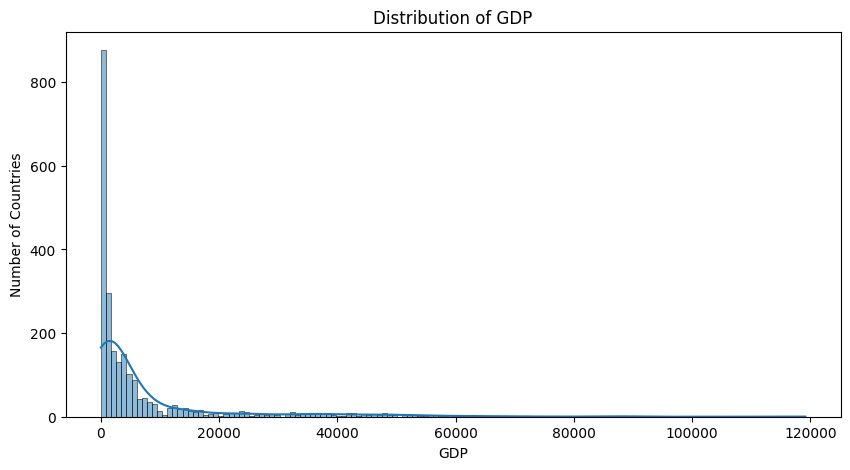

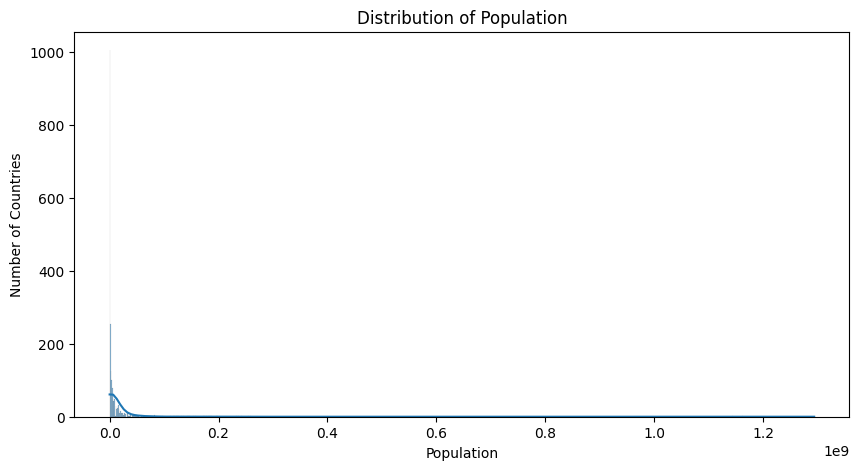

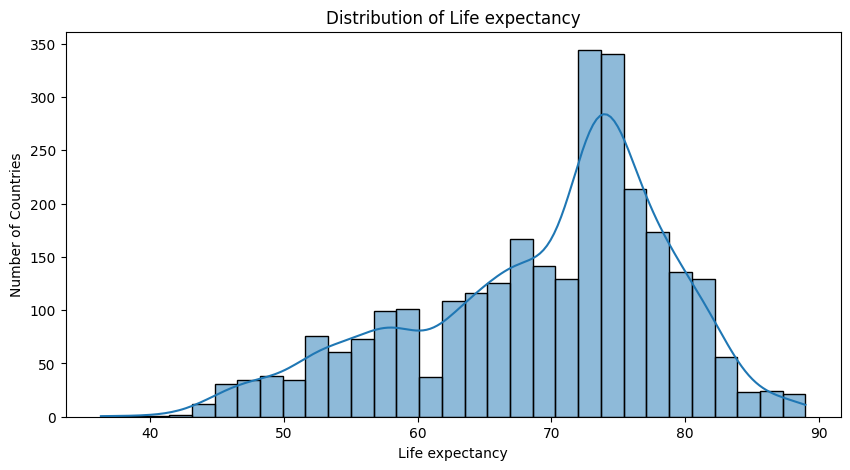

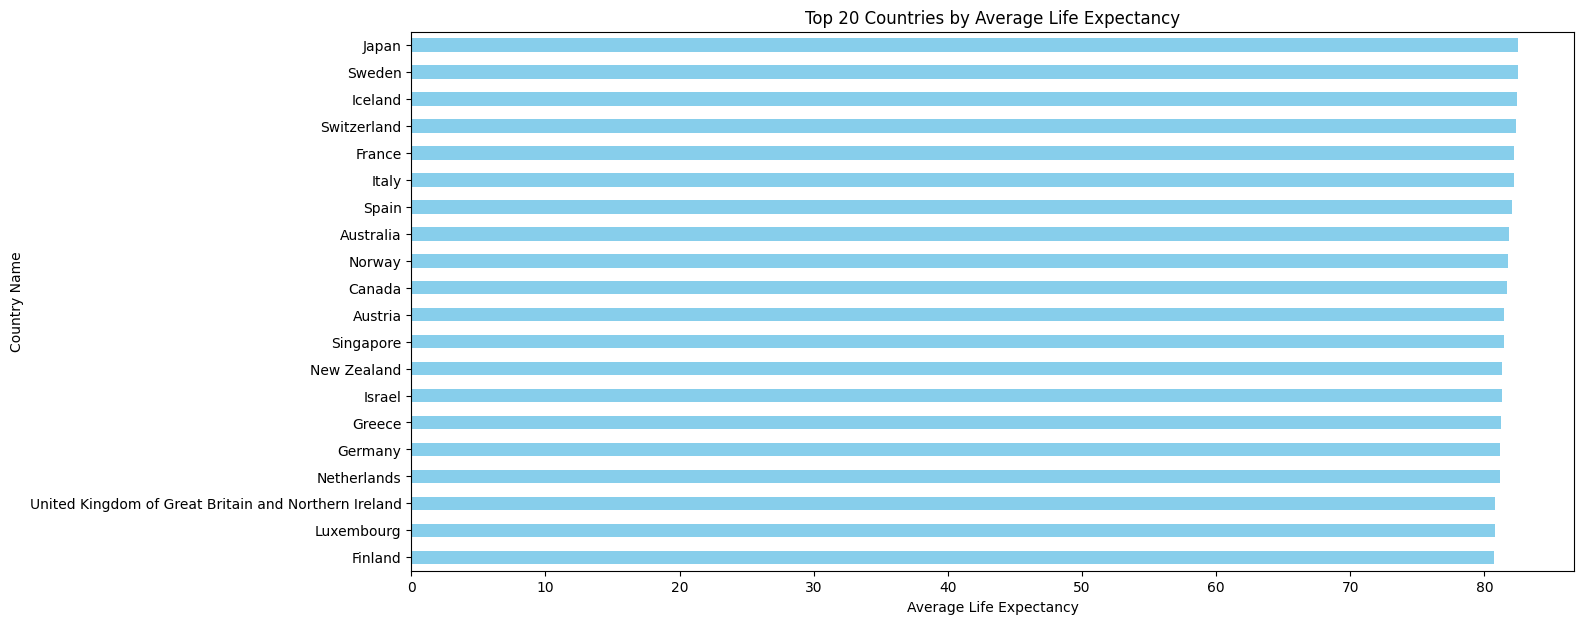

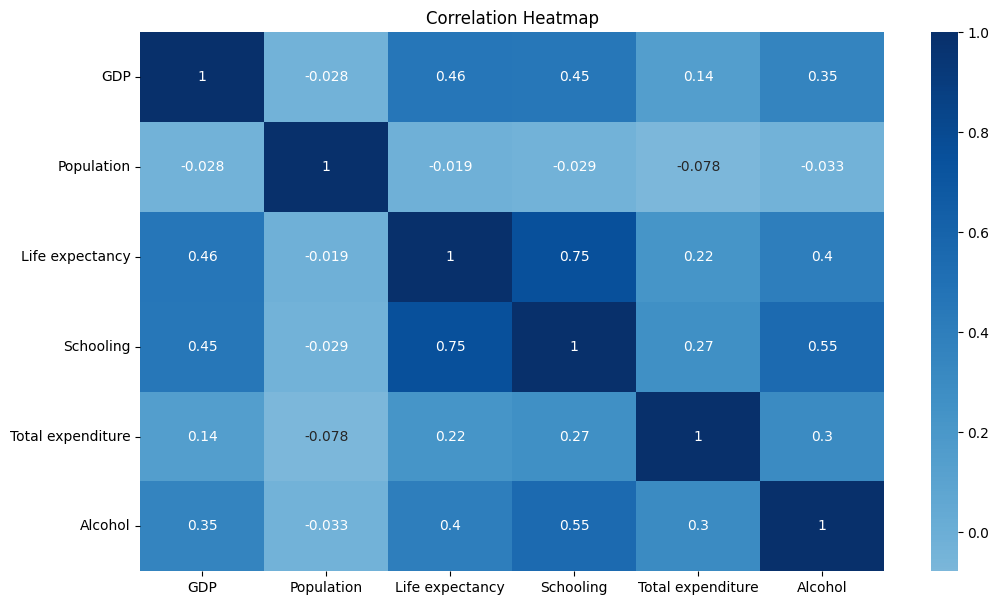

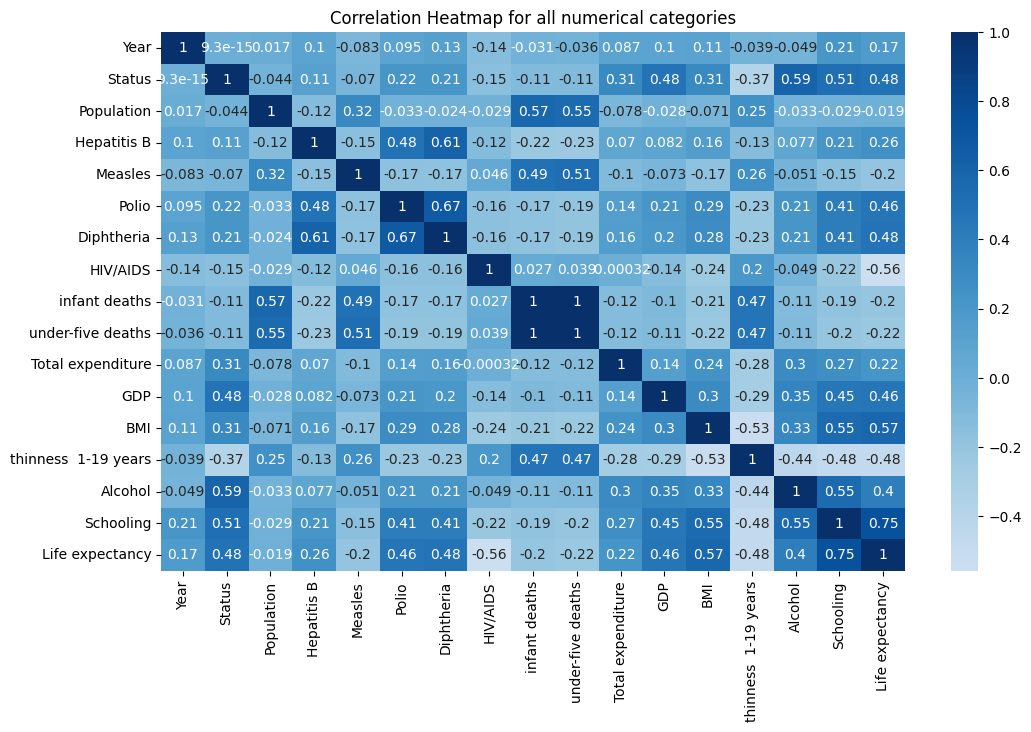

In [3]:
# Visuals of data

# Specify columns of interest and plot
cols_to_inspect = ["GDP", "Population", "Life expectancy"]
for col in cols_to_inspect:
    plt.figure(figsize=(10, 5))
    # dropna to remove missing values for plotting
    sns.histplot(data[col].dropna(), kde=True)  
    plt.title(f'Distribution of {col}')
    plt.ylabel('Number of Countries')
    plt.show()

# Bar plot for 'Life expectancy' by 'Country' - This will only account for the top 20 countries
top_countries = data.groupby("Country")["Life expectancy"].mean().sort_values(ascending=False).head(20)
plt.figure(figsize=(15, 7))
top_countries.sort_values().plot(kind="barh", color="skyblue")
plt.xlabel('Average Life Expectancy')
plt.ylabel('Country Name')
plt.title('Top 20 Countries by Average Life Expectancy')
plt.show()

# Display a correlation heatmap 
correlation_matrix = data[["GDP", "Population", "Life expectancy", "Schooling", "Total expenditure", "Alcohol"]].corr()
plt.figure(figsize=(12, 7))
sns.heatmap(correlation_matrix, annot=True, cmap='Blues', center=0)
plt.title('Correlation Heatmap')
plt.show()

# !! RUN2: Display heatmap of all correlations between all numerical features
# !! RUN2: encode "status" and store in a new df, this will allow status to be used in the heatmap

temp_data = data

# !! RUN2: manually encode for developed/developing

temp_data['Status'] = temp_data['Status'].replace({'Developing' : 0, 'Developed' : 1})

correlation_matrix = temp_data[["Year", "Status", "Population", "Hepatitis B",
    "Measles", "Polio", "Diphtheria", "HIV/AIDS", "infant deaths",
    "under-five deaths", "Total expenditure", "GDP", "BMI",
    "thinness  1-19 years", "Alcohol", "Schooling", "Life expectancy"]].corr()
plt.figure(figsize=(12, 7))
sns.heatmap(correlation_matrix, annot=True, cmap='Blues', center=0)
plt.title('Correlation Heatmap for all numerical categories')
plt.show()


## Step 4: Data pre-processing

### Step 4.1: Split features and targets

* split data into features (X) and targets (y)

### Step 4.2: Handle missing values and encode features

* fill missing values for numerical features using the mean
* fill missing values for categorical features using the mode
* apply one-hot encoding to categorical features

### Step 4.3: Split data and scale/normalize

* split data into training and test subsets
* fit scalar to training subset
* apply scalar to training and test subsets

In [9]:
# Model training run 1
# Separating features (X) and targets (y)

X = data.drop("Life expectancy", axis=1)
y = data["Life expectancy"] 

# fill missing data by mean for numerical features

numerical_cols = X.select_dtypes(include=[np.number]).columns
X[numerical_cols] = X[numerical_cols].apply(lambda col: col.fillna(col.mean()))

# fill missing data by mode for numerical features

categorical_cols = X.select_dtypes(exclude=[np.number]).columns
X[categorical_cols] = X[categorical_cols].apply(lambda col: col.fillna(col.mode()[0]))

# encode categorical features

X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

# split data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardizing data 
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# !!!Run 2 Only run after running through all other code.
If run prematurely, run the previous code block, Step 4, followed by Step 5

In [5]:
# Model Training Run 2 !!!!!!!!!!!!!!!!!!
# Only run this after running through the code once to avoid interfering with Run 1 results

# select features to remove by storing them in a list to be removed from the df

#remove_feat_y = ["Year", "Population", "Hepatitis B", "Measles", "infant deaths", "under-five deaths", "Total expenditure", "Life expectancy"]

remove_feat_y = ["Year", "Population", "Life expectancy"]

# Separating features (X) and targets (y)

X_2 = data.drop(remove_feat_y, axis=1)
y = data["Life expectancy"] 

# fill missing data by mean for numerical features

numerical_cols = X_2.select_dtypes(include=[np.number]).columns
X_2[numerical_cols] = X_2[numerical_cols].apply(lambda col: col.fillna(col.mean()))

# fill missing data by mode for numerical features

categorical_cols = X_2.select_dtypes(exclude=[np.number]).columns
X_2[categorical_cols] = X_2[categorical_cols].apply(lambda col: col.fillna(col.mode()[0]))

# encode categorical features

X_2 = pd.get_dummies(X_2, columns=categorical_cols, drop_first=True)

# split data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X_2, y, test_size=0.3, random_state=42)

# Standardizing data 
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


## Step 5: Training Linear Regression Model

* assign model to object
* fit model to training data

In [14]:
# Training the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

## Step 6: Evaluate Linear Regression Model Performance

* test model accuracy against test set

* test predictions using Root Mean Squared Error (RMSE)
* test predictions using Mean Absolute Error (MAE)
* test predictions using coefficient of determination (r2)
* test predictions using adjusted r2
* Vizualise predictions by plotting residuals

Root Mean Squared Error : 1.96
Mean absolute error: 1.26
Coefficient of determination: 0.96
Adjusted R-squared: 0.9585074521141097


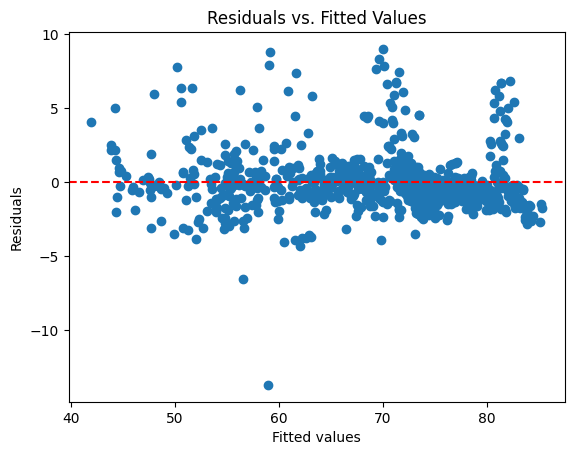

In [15]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Measuring the performance of the model 

# RMSE measures overall error but is outlier sensitive
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Root Mean Squared Error : {rmse:.2f}")

# The mean absolute error measures overall error but is less sensitive to outlier
print("Mean absolute error: %.2f" % mean_absolute_error(y_test, y_pred))

# The coefficient of determination: 1 is perfect prediction
r2 = r2_score(y_test, y_pred)
print("Coefficient of determination: %.2f" % r2)

# The adjusted coefficient of determination (should provide insight on the effect of removing/adding features)
n = data.shape[0]  # Number of observations
k = data.shape[1]  # Number of predictors

adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - k - 1)
print("Adjusted R-squared:", adjusted_r2)

# Compute residuals
residuals = y_test - y_pred

# Plot residuals
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted Values')
plt.show()

# Bonus Step: Hyperparameter optimisation (Status: abandoned due to time constraints)

## Step 1: Identify parameter set

## Step 2: Create dictionary for parameters

## Step 3: Identify most effective configuration using gridsearchCV

In [14]:
# find parameters for lr model

# create dictionary with all possible values for parameters

#param_list = [
#    {'fit_intercept' : [True, False], 'copy_X' : [True, False], 'n_jobs' : [1, -1, -2, -3, -4], 'positive' : [True, False]
#    }
#]

In [21]:
# import grid search

#from sklearn.model_selection import GridSearchCV

# assign tuner to an object containing the lr model and parameter dictionary

#tuner = GridSearchCV(model, param_grid = param_list, cv = 3, verbose = True, n_jobs = -1)

# run tuner and store best model to object

#best_tuner = tuner.fit(X_train, y_train)

#print(best_tuner)

# Further runs

## Aim: train, apply and evaluate other linear regression models

To ensure no code interference, run step 4 before runnign each of these models

In [7]:
# import new models

from sklearn.linear_model import ARDRegression
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import BayesianRidge

Root Mean Squared Error : 2.23
Mean absolute error: 1.47
Coefficient of determination: 0.95
Adjusted R-squared: 0.9462686726599342


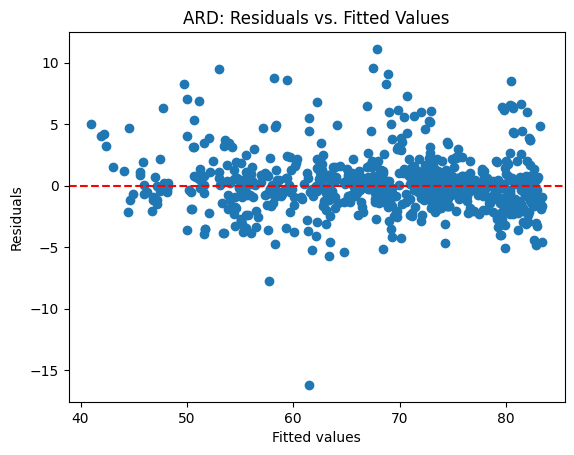

In [8]:
# apply and evaluate ARDRegression

model_ARD = ARDRegression()
model_ARD.fit(X_train, y_train)

# Make predictions on the test set
y_pred_ARD = model_ARD.predict(X_test)

# Measuring the performance of the model 

# RMSE measures overall error but is outlier sensitive
rmse = np.sqrt(mean_squared_error(y_test, y_pred_ARD))
print(f"Root Mean Squared Error : {rmse:.2f}")

# The mean absolute error measures overall error but is less sensitive to outlier
print("Mean absolute error: %.2f" % mean_absolute_error(y_test, y_pred_ARD))

# The coefficient of determination: 1 is perfect prediction
r2 = r2_score(y_test, y_pred_ARD)
print("Coefficient of determination: %.2f" % r2)

# The adjusted coefficient of determination (should provide insight on the effect of removing/adding features)
n = data.shape[0]  # Number of observations
k = data.shape[1]  # Number of predictors

adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - k - 1)
print("Adjusted R-squared:", adjusted_r2)

# Compute residuals
residuals_ARD = y_test - y_pred_ARD

# Plot residuals
plt.scatter(y_pred_ARD, residuals_ARD)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('ARD: Residuals vs. Fitted Values')
plt.show()

Root Mean Squared Error : 1.98
Mean absolute error: 1.27
Coefficient of determination: 0.96
Adjusted R-squared: 0.9576609665921136


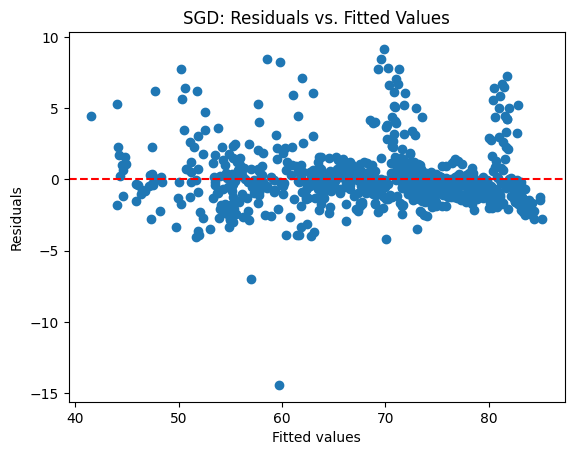

In [10]:
# apply and evaluate SGDRegression

model_SGD = SGDRegressor()
model_SGD.fit(X_train, y_train)

# Make predictions on the test set
y_pred_SGD = model_SGD.predict(X_test)

# Measuring the performance of the model 

# RMSE measures overall error but is outlier sensitive
rmse = np.sqrt(mean_squared_error(y_test, y_pred_SGD))
print(f"Root Mean Squared Error : {rmse:.2f}")

# The mean absolute error measures overall error but is less sensitive to outlier
print("Mean absolute error: %.2f" % mean_absolute_error(y_test, y_pred_SGD))

# The coefficient of determination: 1 is perfect prediction
r2 = r2_score(y_test, y_pred_SGD)
print("Coefficient of determination: %.2f" % r2)

# The adjusted coefficient of determination (should provide insight on the effect of removing/adding features)
n = data.shape[0]  # Number of observations
k = data.shape[1]  # Number of predictors

adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - k - 1)
print("Adjusted R-squared:", adjusted_r2)

# Compute residuals
residuals_SGD = y_test - y_pred_SGD

# Plot residuals
plt.scatter(y_pred_SGD, residuals_SGD)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('SGD: Residuals vs. Fitted Values')
plt.show()

Root Mean Squared Error : 1.99
Mean absolute error: 1.28
Coefficient of determination: 0.96
Adjusted R-squared: 0.9573354151954937


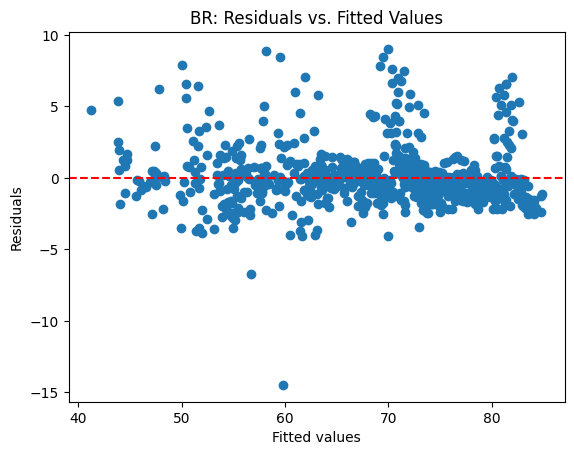

In [11]:
# apply and evaluate BayesianRidge

model_BR = BayesianRidge()
model_BR.fit(X_train, y_train)

# Make predictions on the test set
y_pred_BR = model_BR.predict(X_test)

# Measuring the performance of the model 

# RMSE measures overall error but is outlier sensitive
rmse = np.sqrt(mean_squared_error(y_test, y_pred_BR))
print(f"Root Mean Squared Error : {rmse:.2f}")

# The mean absolute error measures overall error but is less sensitive to outlier
print("Mean absolute error: %.2f" % mean_absolute_error(y_test, y_pred_BR))

# The coefficient of determination: 1 is perfect prediction
r2 = r2_score(y_test, y_pred_BR)
print("Coefficient of determination: %.2f" % r2)

# The adjusted coefficient of determination (should provide insight on the effect of removing/adding features)
n = data.shape[0]  # Number of observations
k = data.shape[1]  # Number of predictors

adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - k - 1)
print("Adjusted R-squared:", adjusted_r2)

# Compute residuals
residuals_BR = y_test - y_pred_BR

# Plot residuals
plt.scatter(y_pred_BR, residuals_BR)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('BR: Residuals vs. Fitted Values')
plt.show()

# Lab Report 1: Using a Linear Regression Model to predict Life Expectancy

## Linear Regression

Linear Regression models are powerful supervised learning tools for training computers to recognise patterns between correlated features and target values to predict continuous values. LR requires a set of features/predictors (X) which are useful and correlated to a set of target values (y). In this context, useful refers to feature data which is known to play a role in some mechanism which affects the target, while correlated implies that there is statistically measurable and significant relationship between the feature and the target. The target values used to train LR models must be continuous values. With these characteristics in mind, appropriate datasets needed to be identified.

## Data collection

Two potential datasets were identified. The first dataset contained Healthcare-related information collected during Covid 19. This dataset was abandoned due to a large number of features which did not meet the requirements for LR. The second dataset identified contained data on Life Expectancy. The Life Expectancy dataset met all the requirements for the lab. The features in the dataset were all expected to be correlated to Life Expectancy ("Country", "Year", "Developed/Developing", "Population_size", vaccines for: "Hepatitis B", "Measles", "Polio", "Diphtheria", prevalence of "HIV/AIDS", "infant deaths", "under-five deaths", "Total expenditure", "GDP", "BMI", "thinness  1-19 years", "Alcohol", and finally "Schooling"). The target values were averages of the life expectancy in each of those countries. Thus, the goal of this lab was to use the Feature values to train a LR model to predict life expectancy.

## Run 1 Methods:

### Step 1: Import libraries

This lab made use of 5 libraries; pandas for data storage and manipulation, numpy for data preprocessing, sk learn for the linear regression model, scaling tool, splitting functions and evaluation metrics. Matpltlib and seaborn were both used for data visualisation.

### Step 2: Load in and inspect data

Data was successfully loaded. All data columns were accounted for. 

_Data structure would be investigated further in second run_

### Step 3: Pre-visualise data and explore correlations between features

Visualising the distribution of countries against population size and GDP revealed large spikes at population/GDP = 0, suggesting that there may be a large number of missing entries for these columns. 

_The presence of missing entries would be investigated further in the second run._

The average life expectancy across countries was visualised using a histogram. The histogram revealed that life expectancy followed a normal distribution which was negatively skewed. The histogram peaked between a life expectancy of 70 and 80.  This suggests that, for the countries and time periods the data represents, the majority of countries tended to have higher life expectancies compared.

_The number of developed vs developing countries would be investigated further in the second run._

20 countries with the highest life expectancies were visualised using a barplot. Notably, the majority of countries were European, with the exceptions of Canada, Israel, Singapore, Japan, New Zealand and Australia. There were was a clear absence of african countries with high life expectancies in the top 20 countries. Furthermore, there was little variation between the average life expectancy for the top 20 countries, with all countries having average life expectancies between 81 and 85 years of age.

A Heatmap was used to visualise correlations between the "GDP", "Population", "Life expectancy", "Schooling", "Total expenditure" and "Alcohol" columns. A strong positive correlation was observed between schooling and life expectancy. This suggests that education may play a very important role in positively influencing life expectancy. There were also strong negative correlations between Life Expectancy and HIV/AIDS as well as "thinness", which would be expected, as higher prevalence of HIV and thinness (which could represent malnourishment) would decrease the life expectancy of the affected individuals.

_A heatmap looking at correlations between all numerical columns would be made in second run._

At this stage all fetures were retained pending further investigation in run 2.

### Step 4: Data pre-processing

Data was split, categorical columns were encoded and data was normalised using a Scalar fit to the training data. For the first run, all features were included in the model to be used as a baseline for future testing, thus the first run will be subject to bias introduced by potentially non/weakly correlated features.

### Step 5: Training Linear Regression Model

Complete, no tuning of hyper parameters

### Step 6: Evaluate Linear Regression Model Performance

Calculated RMSE value to be 1.96. The RMSE represents the Root Mean Squared Error. Predictions which are closer to the target value will produce lower error scores (a score of zero indicating no errors detected), while predictions which are further from the predicted target value will produce higher error scores. The RMSE value here is relatively low, and will be used as a baseline for future runs. MAE was calculated to be lower at 1.26. The MAE also measures error but is less sensitive to outliers as it does not square the error value, and instead takes the absolute mean value. The r2 (0.96) and adjusted r2 (0.9585074521141097) values are both measures which show how closely the model fits the data, with the adjusted r2 value being more sensitive to the number of predictors, which will make it useful for evaluating the effects of removing and adding predictors.

![res_scatter_1.png](res_scatter_1.png)

The residual scatterplot above shows the clustering of actual values lies along the line of predicted values. However, there are still many outliers. These results will all be used as a baseline to assess the effects of removing features and optimising hyperparameters.

## Run 2 Methods:

Run 2 incorporated checks for duplicate entries and quantified missing entries. There were no duplicate entries identified. **Missing values were identified for 10 of the 17 feature columns**. More than 5% of the entries were missing for 6 of these columns, with a maximum of 23% of the entries missing in the population column. All entries were present in the target column.

![hmap_1.png](hmap_1.png)

The heatmap above generated during the second run was used to identify features which were most significantly correlated with Life Expectancy. The significance cutoff was set at 0.4, and any feature with values below were left out during feature selection. This included year, population, hepatitis B vaccine, measles. infant deaths, under 5 deaths and total expenditure.

### Extended feature selection:

![res_scatter_2.png](res_scatter_2.png)

Removing the aforementioned features resulted in suspiciously perfect zero values for the AME and RMSE values, and perfect one values for the r2 and adjusted r2. However, the scatterplot above shows that the model overfit the data in such a way that the performance metrics gave perfect scores. Upon further investigation, a coding error was found which caused a leak of the target values to the model, resulting in the perfect overfitting.

![res_scatter_3.png](res_scatter_3.png)

Upon correcting the error, the above plot was produced. The plot is almost identical to the original plot, with extreme outliers in relatively similar positions, and minor changes in the arrangement of the clusters. However, the RMSE (2.20), MAE (1.46), Coefficient of determination (0.95) and adjusted r2 (0.9477513322680858) were all relatively worse compared to the first run. A few follow up runs removed the least significant features 1 by 1 to see if there was an improvement in the model's predictions. However, as shown in run 2, no improvements were seen in the model evaluation metrics used above. Thus, all features were retained for the remainder of the lab.

All features were considered to be relevant, both through evidence of correlation on the heatmaps, and through discussion of possible mechanisms linking each feature to life expectancy.

## Further runs

### Results from other linear regression models

Three additional linear models were trained on the dataset and used to predict life expectancy, without the use of hyper parameter tuning. These include the Automatic Relevance Determination Regression (ARD), Stochastic Gradient Descent Regression (SGD), and Bayesian Ridge (BR) models. ARD and BR were used as negative controls. ARD is suited for datasets where only a portion of the features is significantly correlated and relevant to making predictions. As shown previously when features were dropped, the standard LR model consistently performed worse, suggesting that all of the features in this dataset are relevant. The BR model, on the other hand, is more suited for bioinformatics work (specifically genomics and transcriptomics) where the number of features exceeds the number of samples. SGD is suited for large datasets where it would be difficult to fit the data all at once. 

All three models had consistently weaker or equivalent scores across all performance metrics compared to the standard linear regression model (See "Further Runs"). However, the scores were all very close. 
For example, SGD's scores were 1.99, 1.27, 0.96 and 0.9573 for RMSE, AME, r2 and adjusted r2 respectively. Standard LR was marginally better at 1.96, 1.26, 0.96 and 0.9585. 

![ARD_scatter.png](ARD_scatter.png)

![SGD_scatter.png](SGD_scatter.png)

![BR_scatter.png](BR_scatter.png)

Furthermore, the residual plots for all four plots are very similar, showing very similar data fits across the different models. It is possible that by collecting more time series data for life expectancy and compiling a larger dataset, the SGD model may outperform the standard linear model.

## Hyper parameter tuning

Hyper parameter tuning was attempted using the GridSearchCV function. This function accepts an input consisting of the model to be tuned (in this case the standard LR model), a dictionary of parameters (which contains all tunable parameters and a list of possible inputs for each parameter), as well as some parameters for optimising the tuner performance (such as the n_jobs parameter for splitting the workload across cpu cores). The tuner was then applied to the datasets of interest (the x_train featureset and y_train target set). At this point the tuner should iterate through all possible parameter combinations, using the r2 score to determine the best fitting set of parameters. However, the tuning step was abandoned due to time constraints

# Discussion: Findings, Limitations and Conclusion

This lab made several findings. Firstly, previsualising the dataset revealed several interesting relationships between  different features. Life expectancy was shown to be most strongly positively correlated with "schooling". Most features were also positively correlated with life expectancy, with the exceptions of HIV, measles, infant deaths, under five deaths, and thinness 1-19 years old. Population appeared to have the weakest correlation, but also consisted of 23% missing entries. Secondly, previsualisation also identified a significant amount of missing entries in 10 of the 17 features, most notably for population, Hepatitis B and GDP. Thirdly, incorporating all features from the dataset produced the best performance for LR models (judged by AME, RMSE, r2, adjusted r2 and residual plot). 

A major limitation in this study was the manner in which the missing values were handled. The missing values were replaced by one of two methods. For columns with numerical values, the mean of the column was used to fill in the missing values. For columns with categorical values, the mode was used to fill the missing data. While sufficient for this project, these steps would introduce biases into the data. Most notably, country-specific patterns may be clouded by using mean/mode replacement, losing an important context-based component of the data. For example, countries with smaller populations may have their population numbers pulled far to the right by taking the column average, with the inverse being true for countries with large populations. 

A possible improvement may be filtering for the country of interest while calculating the mean/mode value. For example, if a country is missing entries for population in the years 2017-2018, but has data for 2016 and 2019, the mean of the latter entries can be used to fill the missing entries of the former. This may still bias the data, but would not introduce as much bias as is done by taking the mean of the column. Furthermore, the features "Population" and "HepatitisB" both had a large amount of missing entries (over 20%), and both were weakly correlated with life expectancy. It is possible that the values used to fill the missing values could have misrepresented these features and hidden patterns of correlation.

Another major limitation is the selection of features from categorical data columns. While features like country of origin would be expected to influence life expectancy, visualisations and metrics showing strong correlation between categorical features and life expectancy would be useful to determine which features should be retained to train the model.

In conclusion, the linear regression model implemented in this lab can be used to make reasonably accurate predictions of life expectancy, however, bias introduced through missing data entries, and noise introduced by limited samples per country pose major limitations to the overall predictive capabilities of the model. Furthermore, the features used in this project may not exhaust all the essential features that should be included for determining life expectancy.

Future projects can build on this model to visualise and explore the data from different perspectives, incorporate more robust measures to preprocess the data, and incorporate additional ML models/hyperparameter tuning to further optimise the model. Training the model on larger data sets over larger time periods may also strengthen the models predictive capabilities. Here, LR was relatively successful at modeling a set of 19 predictors correlated with life expectancy, however, there is still a significant amount of outliers which may have been introduced by algorithm bias, noise, or more complex correlations between features which cannot be modelled accurately using linear regression. LR models are powerful tools making accurate predictions, but incorporating the right combination of ML algorithms in ensemble may prove even more effective at modelling complex data. 
